In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'FB', 'MELI']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start="2016-1-1")["Adj Close"]

In [3]:
mydata

,PG,MSFT,FB,MELI
Date,,,,
2016-01-04,65.451408,49.591045,102.220001,109.231110
2016-01-05,65.660194,49.817291,102.730003,108.962852
2016-01-06,65.025482,48.912338,102.970001,106.628235
2016-01-07,64.457588,47.211048,97.919998,102.256996
2016-01-08,63.447033,47.355835,97.330002,100.429024
...,...,...,...,...
2022-02-07,160.320007,300.950012,224.910004,1035.140015
2022-02-08,159.960007,304.559998,220.179993,1050.869995
2022-02-09,159.600006,311.209991,232.000000,1133.199951


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1540 entries, 2016-01-04 to 2022-02-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1540 non-null   float64
 1   MSFT    1540 non-null   float64
 2   FB      1540 non-null   float64
 3   MELI    1540 non-null   float64
dtypes: float64(4)
memory usage: 60.2 KB


In [5]:
mydata.head()

,PG,MSFT,FB,MELI
Date,,,,
2016-01-04,65.451408,49.591045,102.220001,109.231110
2016-01-05,65.660194,49.817291,102.730003,108.962852
2016-01-06,65.025482,48.912338,102.970001,106.628235
2016-01-07,64.457588,47.211048,97.919998,102.256996
2016-01-08,63.447033,47.355835,97.330002,100.429024


In [6]:
mydata.tail()

,PG,MSFT,FB,MELI
Date,,,,
2022-02-07,160.320007,300.950012,224.910004,1035.140015
2022-02-08,159.960007,304.559998,220.179993,1050.869995
2022-02-09,159.600006,311.209991,232.000000,1133.199951
2022-02-10,157.169998,302.380005,228.070007,1122.420044
2022-02-11,156.289993,295.040009,219.550003,1091.089966


In [10]:
#Iloc = extrai os dados da primeira coluna da matriz
mydata.iloc[0]

PG       65.451408
MSFT     49.591045
FB      102.220001
MELI    109.231110
Name: 2016-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

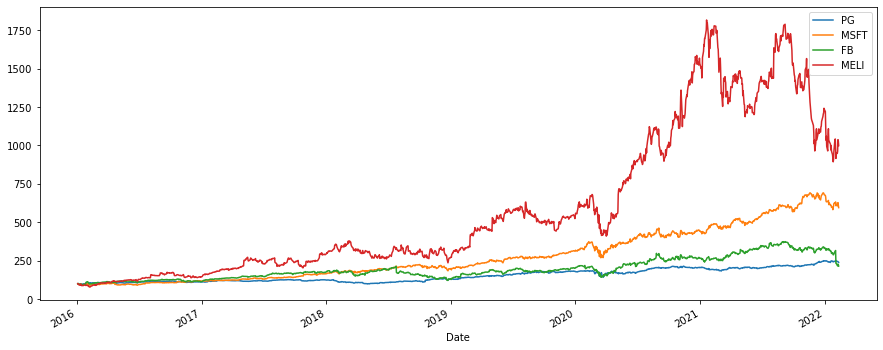

In [11]:
(mydata / mydata.iloc[0] * 100). plot(figsize = (15,6))
plt.show

In [17]:
mydata.loc["2017-1-3"]

PG       72.631248
MSFT     58.185532
FB      116.860001
MELI    160.645721
Name: 2017-01-03 00:00:00, dtype: float64

In [22]:
mydata.iloc[0]

PG       65.451408
MSFT     49.591045
FB      102.220001
MELI    109.231110
Name: 2016-01-04 00:00:00, dtype: float64

In [30]:
#Calculando o retorno do portifolio
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,PG,MSFT,FB,MELI
Date,,,,
2022-02-07,-0.007491,-0.016310,-0.051373,-0.000183
2022-02-08,-0.002246,0.011995,-0.021031,0.015196
2022-02-09,-0.002251,0.021835,0.053683,0.078345
2022-02-10,-0.015226,-0.028373,-0.016940,-0.009513
2022-02-11,-0.005599,-0.024274,-0.037357,-0.027913


In [31]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [32]:
np.dot(returns, weights)

array([        nan,  0.00257139, -0.01173042, ...,  0.03790304,
       -0.01751278, -0.02378577])

In [35]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.159702
MSFT    0.325671
FB      0.184027
MELI    0.485582
dtype: float64

In [36]:
np.dot(annual_returns, weights)

0.28874568214363133

In [38]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) *100) + ' %'
print(pfolio_1)

28.875 %


In [42]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [43]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

28.875 %
24.603 %
